2. Consider any business scenario dataset and apply algorithm to handle the missing
data.

a. Find out the detail of the dataset to check the missing value.

b. According to the missing value, find out the suitable algorithm to handle the
missing data.

c. Apply algorithm to handle the missing data and again check the missing value in
the dataset

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Titanic.csv")

In [3]:
df.shape

(1309, 14)

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
df.drop(['body','home.dest','boat','cabin'],axis=1,inplace=True)
df.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

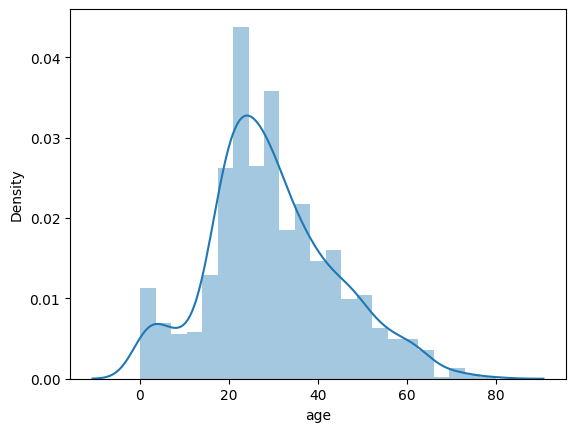

In [8]:
sns.distplot(df.age)

In [9]:
df['age'].fillna(round(df['age'].mean()),inplace=True)
df['age'].isna().sum()

0

<AxesSubplot:xlabel='fare', ylabel='Count'>

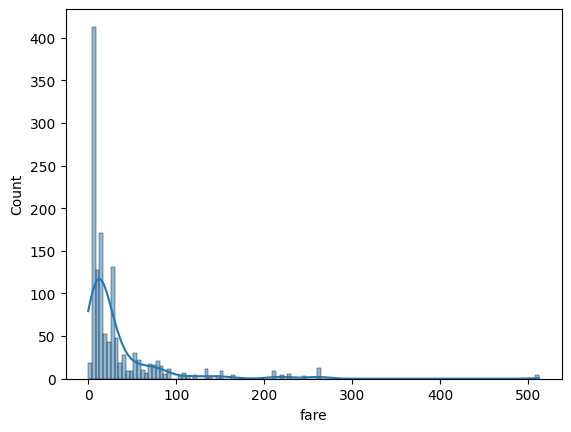

In [10]:
sns.histplot(df.fare, kde = True)

c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

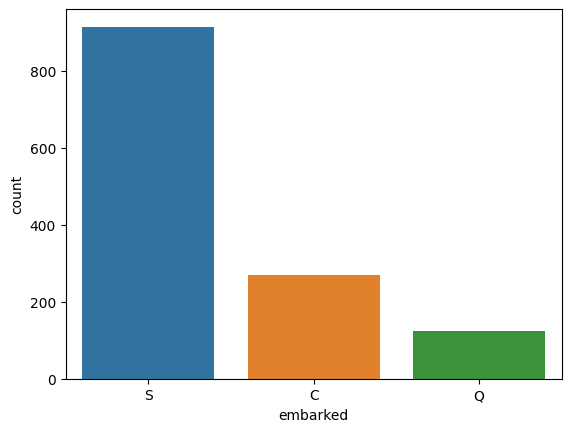

In [11]:
sns.countplot(df.embarked)

In [12]:
df['fare'].fillna(df['fare'].median(),inplace=True)

In [13]:
#hot deck imputatation
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [14]:
print("Total number of non null values in dataset: ",df.isna().sum().sum())

Total number of non null values in dataset:  0


In [25]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,0
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,0


In [15]:
df.replace({'sex':{'male':0,'female':1}, 'embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [16]:
df.shape

(1309, 10)

In [17]:
X = df.drop(columns = ['name','ticket','survived'],axis=1)
Y=df['survived']

In [18]:
#lab 5
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

##LAB 5

Write a program to demonstrate the working of the decision tree based ID3 algorithm.
Use an appropriate data set for building the decision tree and apply this knowledge to
classify a new sample.

a. Create a ID3 model in python

b. Apply the model on the dataset and complete the training

c. Apply unseen dataset to evaluate the performance of trained system and evaluate
the performance on various parameters.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.1,random_state=43)
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=43)


In [20]:
model= dt.fit(x_train,y_train)
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)


Accuracy score of training data :  0.966044142614601


In [28]:
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8015267175572519


In [29]:
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        90
           1       0.65      0.78      0.71        41

    accuracy                           0.80       131
   macro avg       0.77      0.80      0.78       131
weighted avg       0.82      0.80      0.81       131



##LAB 6

Implement K Nearest Neighbors algorithm in a given business environment and
analyze the performance by changing the value of K.
a. Implement the KNN algorithm

b. Apply KNN model on the dataset and perform testing on unseen dataset

c. Change the value of K in KNN and analysis the performance of the model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  
Y_pred = knn.predict(x_test)  
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

In [30]:
print("Training Score: ",acc_knn)

Training Score:  86.42


In [31]:
X_test_prediction = knn.predict(x_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy*100)

Accuracy score of test data :  83.20610687022901


In [32]:
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        90
           1       0.71      0.78      0.74        41

    accuracy                           0.83       131
   macro avg       0.80      0.82      0.81       131
weighted avg       0.84      0.83      0.83       131

